In [1]:
from IPython.display import Image

# 3장. 사이킷런을 타고 떠나는 머신러닝 분류 모델 투어

## 3.1 머신러닝 알고리즘을 훈련하기 위한 다섯 주요 단계 

1. 특성을 선택하고 훈련 샘플을 모읍니다
1. 성능 지표를 선택합니다
1. 분류 모델과 최적화 알고리즘을 선택합니다
1. 모델의 성능을 평가합니다
1. 알고리즘을 튜닝합니다

## 3.2 퍼셉트론 훈련 

In [2]:
import numpy as np
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

print("클래스 레이블:", np.unique(y))

클래스 레이블: [0 1 2]


In [4]:
print("특성 이름:", iris.feature_names)
print("클래스 이름:", iris.target_names)

특성 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
클래스 이름: ['setosa' 'versicolor' 'virginica']


---

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [6]:
print("y의 종류 별 레이블 갯수:", np.bincount(y))
print("y_train의 종류 별 레이블 갯수:", np.bincount(y_train))
print("y_test의 종류 별 레이블 갯수:", np.bincount(y_test))

y의 종류 별 레이블 갯수: [50 50 50]
y_train의 종류 별 레이블 갯수: [35 35 35]
y_test의 종류 별 레이블 갯수: [15 15 15]


In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

---

In [8]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [9]:
y_pred = ppn.predict(X_test_std)

print("잘못 분류된 샘플 갯수: %d" % (y_test != y_pred).sum())

잘못 분류된 샘플 갯수: 1


In [10]:
from sklearn.metrics import accuracy_score

print("정확도: %.3f" % accuracy_score(y_test, y_pred))

정확도: 0.978


In [11]:
print("정확도: %.3f" % ppn.score(X_test_std, y_test))

정확도: 0.978


---

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [13]:
def plot_decision_regions(X, y, target_names, classifier, test_idx=None, resolution=0.02):
    
    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], 
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=target_names[idx],
                    edgecolor='black')
        
    # 테스트 샘플을 부각하여 그립니다
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s = 100,
                    facecolor='none',
                    edgecolor='black',
                    label='test set')

---

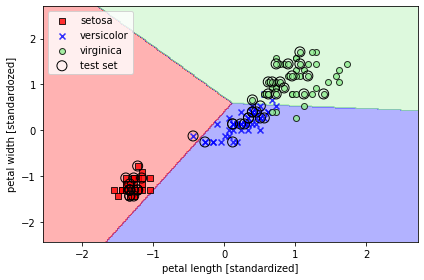

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      target_names=iris.target_names,
                      classifier=ppn,
                      test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardozed]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
help(Perceptron)

Help on class Perceptron in module sklearn.linear_model._perceptron:

class Perceptron(sklearn.linear_model._stochastic_gradient.BaseSGDClassifier)
 |  Perceptron(*, penalty=None, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)
 |  
 |  Perceptron
 |  
 |  Read more in the :ref:`User Guide <perceptron>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  penalty : {'l2','l1','elasticnet'}, default=None
 |      The penalty (aka regularization term) to be used.
 |  
 |  alpha : float, default=0.0001
 |      Constant that multiplies the regularization term if regularization is
 |      used.
 |  
 |  l1_ratio : float, default=0.15
 |      The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.
 |      `l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.
 |      Only used if `penalty='elasticne

## 3.3 로지스틱 회귀를 사용한 클래스 확률 모델링 

\begin{align*}
 \mathrm{logit} \,P(y=1 | \mathbf{x})&= \log \frac{P}{1-P} = \mathbf{w}^T \mathbf{x}=z\\ 
 &\Downarrow \\ 
 \phi (z) &= \frac{1}{1+e^{-z}} 
\end{align*}

In [16]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

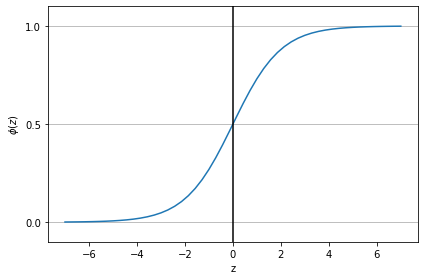

In [17]:
z = np.linspace(-7, 7)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.yticks([0.0, 0.5, 1.0])

ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

\begin{align*}
 L(\mathbf{w}) = P(\mathbf{y}|\mathbf{x}; \mathbf{w})&= \prod_{i=1}^n P \left(y^{(i)}| \mathbf{x}^{(i)}; \mathbf{w} \right ) = \prod_{i=1}^n \left(\phi\left(z^{(i)} \right) \right)^{y^{(i)}}
\left(1-\phi\left(z^{(i)} \right) \right)^{1-y^{(i)}}\\ 
&\Downarrow \\ 
l(\mathbf{w}) = \log L(\mathbf{w})&= \sum_{i=1}^n \left[y^{(i)} \log \phi\left(z^{(i)}\right) 
+\left(1-y^{(i)} \right ) \log \left (1-\phi\left(z^{(i)}\right)  \right )\right ]\\ 
&\Downarrow \\ 
J(\mathbf{w}) &= -\sum_{i=1}^n \left[y^{(i)} \log \phi\left(z^{(i)}\right) 
+\left(1-y^{(i)} \right ) \log \left (1-\phi\left(z^{(i)}\right)  \right )\right ]\\ 
&\Downarrow \\
\text{샘플링이}& \text{ 하나인 경우}\\ 
 J(\phi(z), y; \mathbf{w})&=-y \log \phi(z) -(1-y) \log (1-\phi(z)) \\
&\Downarrow \\
 J(\phi(z), y; \mathbf{w})&=
\begin{cases}
 -\log \phi(z) & \text{ at } y=1 \\ 
 -\log (1-\phi(z)) & \text{ at } y=0 
\end{cases}
\end{align*}

In [18]:
cost_1 = lambda z: -np.log(sigmoid(z))
cost_0 = lambda z: -np.log(1 - sigmoid(z))

In [19]:
z = np.linspace(-10, 10)
phi_z = sigmoid(z)

In [20]:
c1 = [cost_1(x) for x in z]
c0 = [cost_0(x) for x in z]

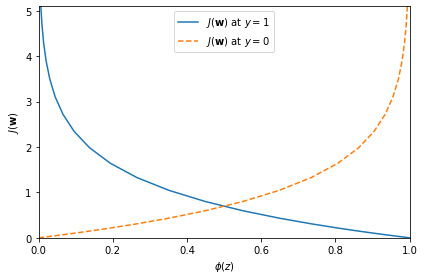

In [21]:
plt.plot(phi_z, c1, label="$J(\mathbf{w})$ at $y=1$")
plt.plot(phi_z, c0, ls='--', label="$J(\mathbf{w})$ at $y=0$")

plt.xlim([0, 1])
plt.ylim([0.0, 5.1])
plt.xlabel('$\phi(z)$')
plt.ylabel('$J(\mathbf{w})$')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

---

In [22]:
class LogisticRegressionGD():
    """
    경사 하강법을 사용한 로지스틱 회귀 분류기
    """
    
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=(1 + X.shape[1]))
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = -(y.dot(np.log(output)) + (1 - y).dot(np.log(1 - output)))  # 로지스틱 비용
            self.cost_.append(cost)
        
        return self
            
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)    

In [23]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

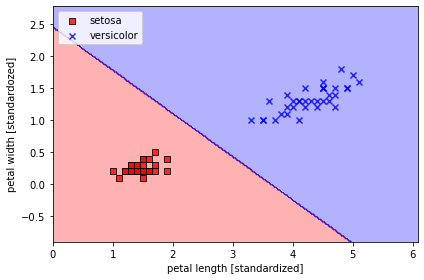

In [24]:
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X=X_train_01_subset, y=y_train_01_subset) 

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, target_names=iris.target_names[:2], classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardozed]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

\begin{align*}
 \frac{\partial }{\partial w_j} l(\mathbf{w})&= \left( y \frac{1}{\phi(z)} -(1-y) \frac{1}{1-\phi(z)} \right )
 \frac{\partial }{\partial w_j} \phi(z)\\ 
 &= \left( y \frac{1}{\phi(z)} -(1-y) \frac{1}{1-\phi(z)} \right )
 \phi(z) (1-\phi(z))\frac{\partial }{\partial w_j} z\\ 
 &= \left(y(1-\phi(z) -(1-y)\phi(z)) \right ) x_j\\ 
 &= \left(y-\phi(z) \right) x_j\\ 
 &\Downarrow \\ 
 \Delta \mathbf{w}&= \eta \nabla l(\mathbf{w}) = -\eta \nabla J(\mathbf{w})\\ 
 &= \eta \sum_{i=1}^n \left(y^{(i)} -\phi(z^{(i)}) \right) x_j^{(i)}
\end{align*}

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100, random_state=1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100, random_state=1)

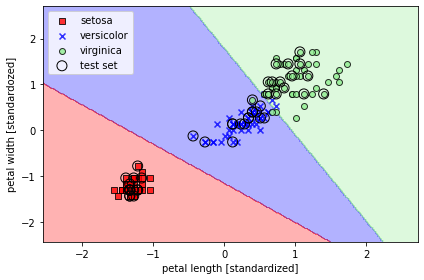

In [26]:
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      target_names=iris.target_names,
                      classifier=lr,
                      test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardozed]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [27]:
lr.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [28]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [29]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [30]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

---

### Regularization

\begin{align*}
J(\mathbf{w}) &= -\sum_{i=1}^n \left[y^{(i)} \log \phi\left(z^{(i)}\right) 
+\left(1-y^{(i)} \right ) \log \left (1-\phi\left(z^{(i)}\right)  \right )\right ] +\frac{\lambda}{2} \sum_{j=1}^m w_j^2 
\end{align*}

In [31]:
Image(url='https://git.io/Jtm2V', width=700)

In [32]:
weights, params = [], []

for C in np.arange(-5, 5):
    lr = LogisticRegression(C=10.0**C, random_state=1, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])  # versicolor 클래스의 가중치
    params.append(10.0**C)

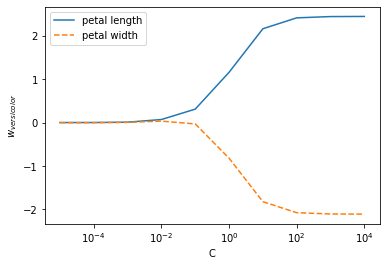

In [33]:
weights = np.array(weights)

plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], ls='--', label='petal width')

plt.xlabel('C')
plt.ylabel('$w_{versicolor}$')
plt.xscale('log')
plt.legend()
plt.show()

## 3.4 서포트 백터 머신을 사용한 최대 마진 분류 

In [34]:
Image(url='https://git.io/Jtm2r', width=700)

\begin{align*}
 w_0 +\mathbf{w}^T\mathbf{x}_{pos} &= 1\\ 
 w_0 +\mathbf{w}^T\mathbf{x}_{neg} &= -1\\ 
 &\Downarrow \\ 
 \mathbf{w}^T(\mathbf{w}_{pos} - \mathbf{w}_{neg}) &= 2 \\ 
 &\Downarrow \\ 
 \frac{\mathbf{w}^T(\mathbf{w}_{pos} - \mathbf{w}_{neg})}{\left \| \mathbf{w} \right \|} &= \frac{2 }{\left \| \mathbf{w} \right \|} \leftarrow \text{maximize subject to }
 \begin{cases}
 w_0 +\mathbf{w}^T\mathbf{x}^{(i)} \geq 1 & \text{ when } y^{(i)}= 1 \\ 
 w_0 +\mathbf{w}^T\mathbf{x}^{(i)} \leq -1 & \text{ when } y^{(i)}= -1 
\end{cases} 
 \\
 &\Downarrow \\ 
 \mathrm{min} \frac{1}{2}\left \| \mathbf{w} \right \|^2 \text{ subject to }
y^{(i)} &\left(w_0 + \mathrm{w}^T \mathbf{x}^{(i)} \right) \geq 1, \;\;\forall \,i
\end{align*}

[참고자료](https://ratsgo.github.io/machine%20learning/2017/05/23/SVM/)

[참고자료: KKT](https://ratsgo.github.io/convex%20optimization/2018/01/26/KKT/)

[참고자료: Duality](https://ratsgo.github.io/convex%20optimization/2018/01/25/duality/)

### 슬랙 변수를 사용하여 선형 분류 문제 다루기

\begin{align*}
 w_0 +\mathbf{w}^T\mathbf{x}^{(i)} \geq 1 -\xi^{(i)} & \text{ when } y^{(i)}= 1 \\ 
 w_0 +\mathbf{w}^T\mathbf{x}^{(i)} \leq -1 +\xi^{(i)}& \text{ when } y^{(i)}= -1 \\
 &\Downarrow \\
 \frac{1}{2} \left \| \mathbf{w} \right \|&2 + C \left(\sum_i \xi^{(i)} \right ) 
\end{align*}

[참고자료](https://ratsgo.github.io/machine%20learning/2017/05/29/SVM2/)

In [35]:
Image(url='https://git.io/Jtm26', width=600)

In [36]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

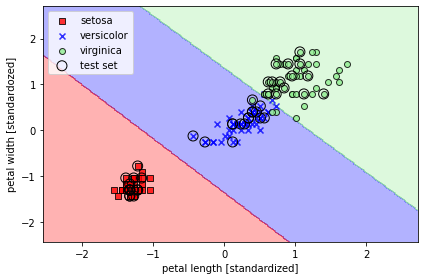

In [37]:
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      target_names=iris.target_names,
                      classifier=svm,
                      test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardozed]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 확률적 경사 하강법을 사용한 구현

In [38]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

## 3.5 커널 SVM을 사용하여 비선형 문제 풀기 

In [39]:
Image(url='https://git.io/Jtm2X', width=700)

$$\phi(x_1, x_2) =(x_1,x_2,x_1^2+x_2^2)=(z_1,z_2,z_3)$$

### Kernel Trick

$$ \mathcal{K} \left( \mathbf{x}^{(i)}, \mathbf{x}^{(j)} \right) =\phi \left ( \mathbf{x}^{(i)} \right )^T \phi \left ( \mathbf{x}^{(j)} \right ) = \exp \left ( -\gamma \left \| \mathbf{x}^{(i)}-\mathbf{x}^{(j)} \right \|^2 \right ) $$

[참고자료](https://ratsgo.github.io/machine%20learning/2017/05/30/SVM3/)

In [40]:
np.random.seed(1)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

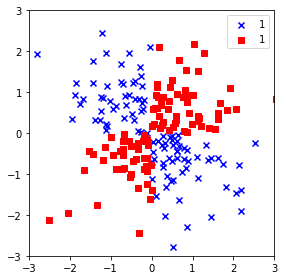

In [41]:
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')

ax = plt.gca()
ax.set_aspect('equal', 'box')
plt.tight_layout()
plt.show()

---

In [42]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)

svm.fit(X_xor, y_xor)

SVC(C=10.0, gamma=0.1, random_state=1)

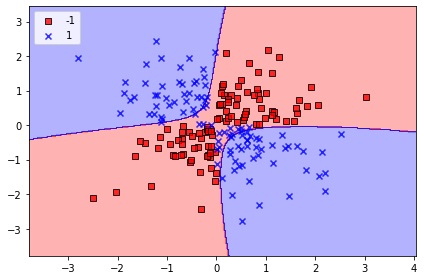

In [43]:
plot_decision_regions(X=X_xor,
                      y=y_xor,
                      target_names=['-1', '1'],
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

---

In [44]:
svm = SVC(kernel='rbf', random_state=1, gamma=1.0, C=10.0)

svm.fit(X_xor, y_xor)

SVC(C=10.0, gamma=1.0, random_state=1)

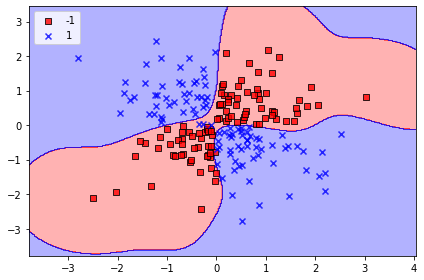

In [45]:
plot_decision_regions(X=X_xor,
                      y=y_xor,
                      target_names=['-1', '1'],
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

---

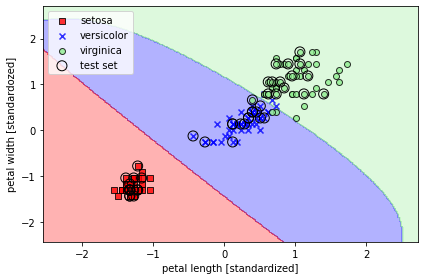

In [46]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      target_names=iris.target_names,
                      classifier=svm,
                      test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardozed]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

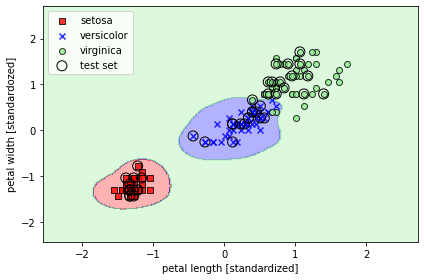

In [47]:
svm = SVC(kernel='rbf', random_state=1, gamma=10.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      target_names=iris.target_names,
                      classifier=svm,
                      test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardozed]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 3.6 결정 트리 학습

In [48]:
Image(url='https://git.io/Jtm21', width=500)

\begin{align*}
 IG\left ( D_p, f \right ) &= I\left( D_p \right) -\sum_{j=1}^m \frac{N_j}{N_p} I \left ( D_j \right )\\ 
 &\Downarrow \text{ binary tree } \\ 
 &= I\left( D_p \right) -\frac{N_{left}}{N_p} I \left ( D_{left} \right ) -\frac{N_{right}}{N_p} I \left ( D_{right} \right ) \\ \\
 I\,(\text{impurity}) &= \begin{cases}
 I_G, \;\;\; \text{Gini impurity}  = \sum_{i=1}^c p(i|t)\left(1-p(i|t) \right ) =1 - \sum_{i=1}^c p(i|t)^2\\ 
 I_H, \;\;\; \text{entropy} = -\sum_{i=1}^c p(i|t) \log_2 p(i|t)\\ 
 I_E, \;\;\; \text{classification error} =1 -\max\{p(i|t) \}
\end{cases}\\ 
\end{align*}

In [49]:
def gini(p):
    return p*(1-p) + (1 - p)*(1 - (1 - p))

def entropy(p):
    eps = 1.0e-14
    return -p*np.log2(p +eps) - (1 - p)*np.log2(1 - p +eps)

def error(p):
    return 1 - np.max([p, 1 - p], axis=0)

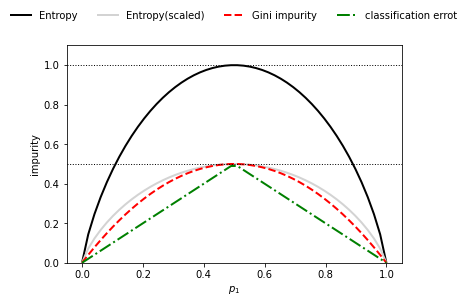

In [50]:
p = np.linspace(0.0, 1.0)

fig, ax = plt.subplots()

for impurity, label, ls, color, in zip([entropy(p), 0.5*entropy(p), gini(p), error(p)],
                                       ['Entropy', 'Entropy(scaled)', 'Gini impurity', 'classification errot'],
                                       ['-', '-', '--', '-.'],
                                       ['black', 'lightgray', 'red', 'green']):
    ax.plot(p, impurity, label=label, ls=ls, lw=2, color=color)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), frameon=False, ncol=4)
ax.axhline(y=0.5, lw=1, color='k', ls=':')
ax.axhline(y=1.0, lw=1, color='k', ls=':')
plt.ylim([0, 1.1])
plt.xlabel('$p_1$')
plt.ylabel('impurity')
plt.show()

In [71]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

In [72]:
tree_model.fit(X_train, y_train)  # 이진 트리는 자료의 표준화가 필요없음

DecisionTreeClassifier(max_depth=4, random_state=1)

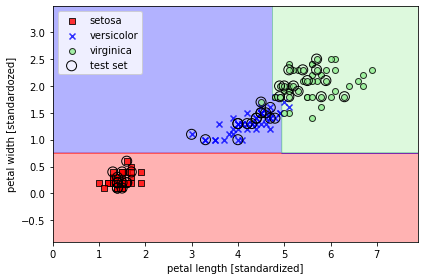

In [73]:
X_combined = np.vstack((X_train, X_test))

plot_decision_regions(X=X_combined,
                      y=y_combined,
                      target_names=iris.target_names,
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardozed]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

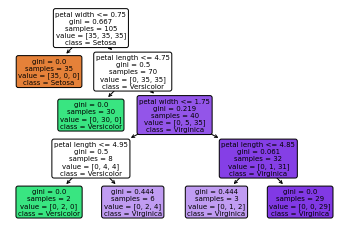

In [74]:
from sklearn import tree


tree.plot_tree(tree_model,
               impurity=True,
               filled=True, 
               rounded=True,
               class_names=['Setosa', 'Versicolor', 'Virginica'],
               feature_names=['petal length', 'petal width'])
plt.show()

In [75]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'],
                           feature_names=['petal length', 'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree_model.png')

True

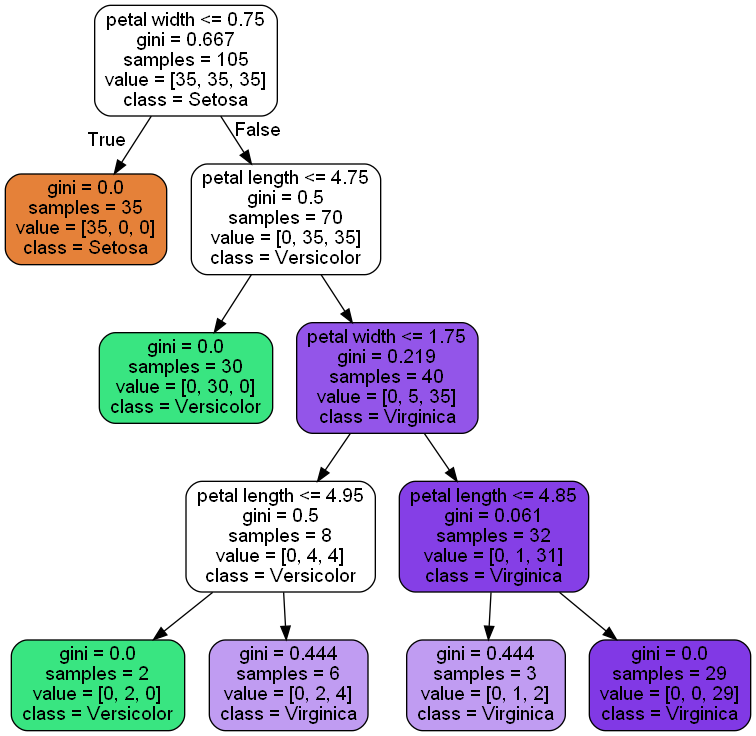

In [76]:
Image('tree_model.png', width=600)

---

### 랜덤 포레스트로 여러 개의 결정 트리 연결

1. n개의 랜덤한 bootstrap 샘플을 뽑습니다
1. bootstrap 샘플에서 결정 트리를 학습합니다
    1. 중복을 허용하지 않고 랜덤하게 d개의 특성을 선택합니다
    2. 정보 이득과 같은 목적 함수를 기준으로 최선의 분할을 만드는 특성을 사용해서 노드를 분할합니다
1. 단계 1, 2를 반복합니다
1. 각 트리의 예측을 모아 다수결 투표로 클래스 레이블을 할당합니다

In [79]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)

In [80]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1)

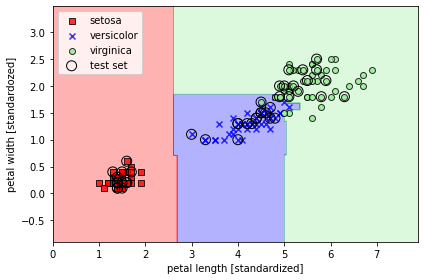

In [81]:
plot_decision_regions(X=X_combined,
                      y=y_combined,
                      target_names=iris.target_names,
                      classifier=forest,
                      test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardozed]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 3.7 k-최근접 이웃: 게으른 학습 알고리즘

In [82]:
Image(url='https://git.io/Jtm25', width=400)

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

In [85]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

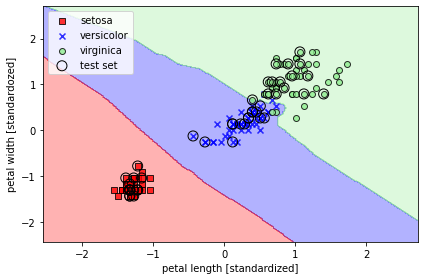

In [87]:
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      target_names=iris.target_names,
                      classifier=knn,
                      test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardozed]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()